# Salary Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from utils import *
import copy
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

In [3]:
# Loading Dataset
ds = pd.read_csv("/kaggle/input/salary-prediction/Salary_dataset.csv")

In [4]:
# info of dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
# Check for the missing values in the dataset
ds.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
ds = ds.drop("Unnamed: 0", axis = 1)

In [7]:
# Visualise the data
ds.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
ds.tail(5)

,YearsExperience,Salary
25,9.1,105583.0
26,9.6,116970.0
27,9.7,112636.0
28,10.4,122392.0
29,10.6,121873.0


In [9]:
#check dimensions of dataset
ds.shape

(30, 2)

In [10]:
# Spliting dataset into input and output (i.e x and y)
X = ds.iloc[:,:1]
y = ds.iloc[:,1]

In [11]:
# visualise x and y
print("x : ",X)
print()
print("y : ",y)

x :      YearsExperience
0               1.2
1               1.4
2               1.6
3               2.1
4               2.3
5               3.0
6               3.1
7               3.3
8               3.3
9               3.8
10              4.0
11              4.1
12              4.1
13              4.2
14              4.6
15              5.0
16              5.2
17              5.4
18              6.0
19              6.1
20              6.9
21              7.2
22              8.0
23              8.3
24              8.8
25              9.1
26              9.6
27              9.7
28             10.4
29             10.6

y :  0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109

In [12]:
x_train = X
y_train = y

In [13]:
# visualise data
print("First five elements in X_train are:\n", x_train[:5])
print("Type of X_train:",type(x_train))
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in X_train are:
    YearsExperience
0              1.2
1              1.4
2              1.6
3              2.1
4              2.3
Type of X_train: <class 'pandas.core.frame.DataFrame'>
First five elements in y_train are:
 0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64
Type of y_train: <class 'pandas.core.series.Series'>


In [14]:
# Check the dimensions of data
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (30, 1)
The shape of y_train is: (30,)
We have m = 30 training examples


In [15]:
# convert pandas series & dataframe to numpy ndarray
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [16]:
y_train


array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

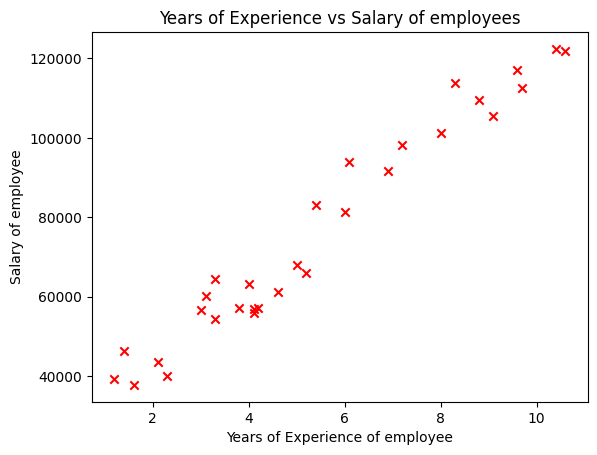

In [17]:
# Visualize data
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.title("Years of Experience vs Salary of employees")
plt.ylabel("Salary of employee")
plt.xlabel("Years of Experience of employee")
plt.show()

### Model Training

In [18]:
# Cost function for linear regression
def compute_cost(x, y, w, b):
    m = x.shape[0]
    
    total_cost = 0
    
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
        
    total_cost = cost/(2*m)
    return total_cost

In [19]:
# Gradient for linear regression
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i]) * x[i]
        
    dj_dw /= m
    dj_db /= m
    
    return dj_db, dj_dw

In [20]:
# Learning parameters using batch gradient descent
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    
    j_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i<100000:
            cost = cost_function(x, y, w, b)
            j_history.append(cost)
            
        if i% math.ceil(num_iters/50) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(j_history[-1][0]):8.2f} ")
        
    return w, b, j_history, w_history

In [21]:
import random
initial_w = random.randint(1, 10)
initial_b = 0

iterations = 3000
alpha = 0.0001

w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b,
                        compute_cost, compute_gradient, alpha, iterations)
print("w & b found by gradient descent : ", w, b)

Iteration    0: Cost 3243701529.01 
Iteration   60: Cost 2831334619.35 
Iteration  120: Cost 2472198910.76 
Iteration  180: Cost 2159427507.41 
Iteration  240: Cost 1887039389.37 
Iteration  300: Cost 1649825128.88 
Iteration  360: Cost 1443247350.07 
Iteration  420: Cost 1263354029.92 
Iteration  480: Cost 1106702984.08 
Iteration  540: Cost 970296094.35 
Iteration  600: Cost 851522021.35 
Iteration  660: Cost 748106307.60 
Iteration  720: Cost 658067917.59 
Iteration  780: Cost 579681384.46 
Iteration  840: Cost 511443840.08 
Iteration  900: Cost 452046298.37 
Iteration  960: Cost 400348643.28 
Iteration 1020: Cost 355357843.50 
Iteration 1080: Cost 316208977.64 
Iteration 1140: Cost 282148707.19 
Iteration 1200: Cost 252520881.66 
Iteration 1260: Cost 226754000.74 
Iteration 1320: Cost 204350293.88 
Iteration 1380: Cost 184876208.68 
Iteration 1440: Cost 167954126.42 
Iteration 1500: Cost 153255146.22 
Iteration 1560: Cost 140492800.15 
Iteration 1620: Cost 129417579.18 
Iteration 1

In [22]:
# Evaluating logistic regression
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

/tmp/ipykernel_74/732241793.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted[i] = w * x_train[i] + b


Text(0.5, 0, 'Years of Experience of employee')

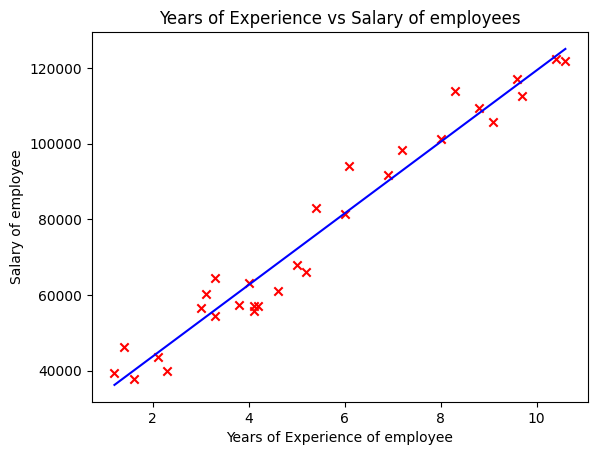

In [26]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Years of Experience vs Salary of employees")
# Set the y-axis label
plt.ylabel("Salary of employee")
# Set the x-axis label
plt.xlabel("Years of Experience of employee")

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


x_train = x_train.reshape(-1, 1)
model.fit(x_train, y_train)



m = x_train.shape[0]
predicted = np.zeros(m)


predicted = model.predict(x_train)

print(model.coef_)
print(model.intercept_)

[9449.96232146]
24848.203966523193


Text(0.5, 0, 'Years of Experience of employee')

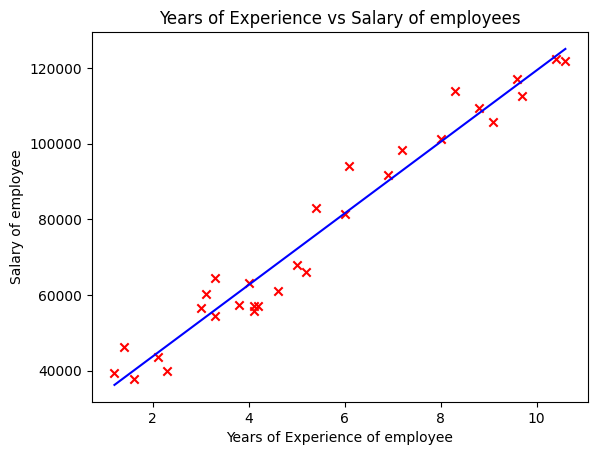

In [28]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Years of Experience vs Salary of employees")
# Set the y-axis label
plt.ylabel("Salary of employee")
# Set the x-axis label
plt.xlabel("Years of Experience of employee")